In [64]:
import numpy as np
import pandas as pd
import nltk
import glob


path = '../Output/analyzed'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    temp = pd.read_csv(filename)
    li.append(temp)

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(li, ignore_index=True)

df.drop_duplicates(subset='title', inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 364
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author           1 non-null      object 
 1   collection_date  163 non-null    object 
 2   publication      17 non-null     object 
 3   title            162 non-null    object 
 4   sentiment        163 non-null    float64
 5   tokens           163 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.9+ KB
None


In [65]:
from collections import Counter

# Splitting text into words and counting
all_words = ' '.join(df['tokens']).split()
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(100)
# Convert the list of tuples into a DataFrame
df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Display the DataFrame
#df_most_common_words

In [66]:
# Initialize a list to store the average sentiment for each word
average_sentiments = []

for word in df_most_common_words['Word']:
    # Filter df for articles containing the word
    filtered_df = df[df['tokens'].apply(lambda tokens: word in tokens)]
    
    # Calculate average sentiment for these articles
    average_sentiment = filtered_df['sentiment'].mean()
    
    # Append the average sentiment to the list
    average_sentiments.append(average_sentiment)

# Add the average sentiments as a new column in df_most_common_words
df_most_common_words['Average Sentiment'] = average_sentiments

# Display the DataFrame
df_most_common_words


,Word,Count,Average Sentiment
0,"'rate',",245,0.532310
1,"'inflation',",193,0.546068
2,"'market',",190,0.489383
3,"'new',",189,0.553625
4,"'month',",143,0.481887
...,...,...,...
95,"'carbon',",52,0.995833
96,"'take',",51,0.333251
97,"'around',",51,0.495297
98,"'expected',",51,0.782870


In [72]:
df_highest_sentiment = df_most_common_words.sort_values(by='Average Sentiment', ascending=False).head(25)
df_lowest_sentiment = df_most_common_words.sort_values(by='Average Sentiment', ascending=True).head(25)

# Display the DataFrame with the highest sentiment words
#print("25 Highest Sentiment Words:")
#display(df_highest_sentiment)

# Display the DataFrame with the lowest sentiment words
print("\n25 Lowest Sentiment Words:")
display(df_lowest_sentiment)



25 Lowest Sentiment Words:


,Word,Count,Average Sentiment
66,"'war',",63,-0.066400
87,"'biden',",53,0.064533
28,"'trump',",84,0.105418
88,"'end',",52,0.177026
40,"'government',",76,0.244784
64,"'america',",65,0.266575
52,"'american',",70,0.272526
25,"'country',",89,0.272888
96,"'take',",51,0.333251
44,"'say',",75,0.336316


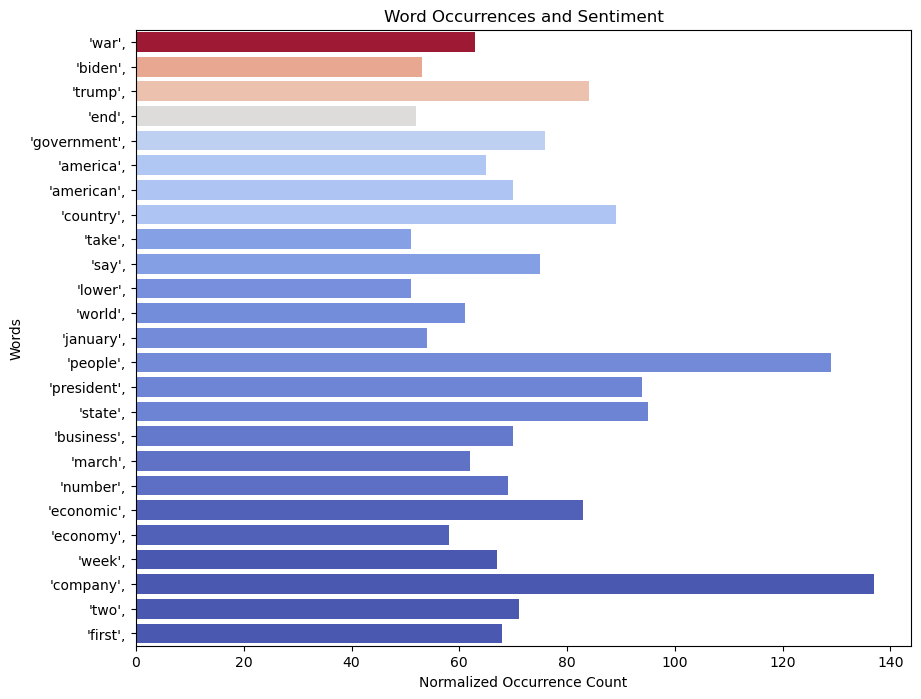

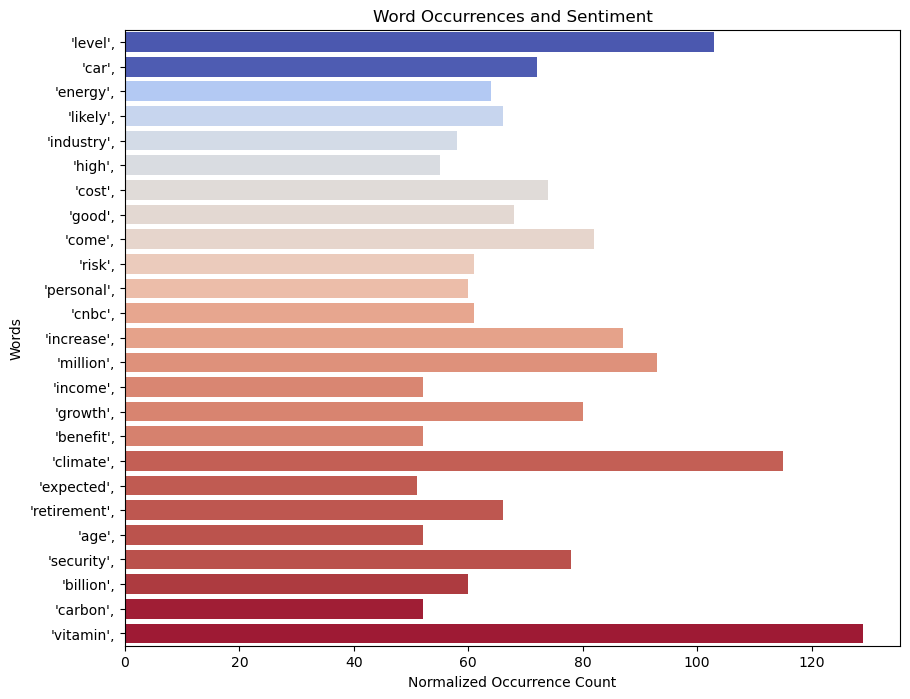

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Setup colors for lowest sentiment 
# Normalize the sentiment scores to be in the range [0, 1] for color mapping
normalized_sentiment = (df_lowest_sentiment['Average Sentiment'] - df_lowest_sentiment['Average Sentiment'].max()) / (df_lowest_sentiment['Average Sentiment'].min() - df_lowest_sentiment['Average Sentiment'].max())

# Get a colormap
cmap = plt.get_cmap('coolwarm')
colors = cmap(normalized_sentiment)
df_lowest_sentiment['Normalized Count'] = df_lowest_sentiment['Count'] / df_lowest_sentiment['Count'].max()
df_lowest_sentiment['Sentiment Color'] = df_lowest_sentiment['Average Sentiment'].apply(lambda x: (x + 1) / 2)  # Adjusting range to [0,1]

# Create the lowest sentiment bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Count',
    y='Word',
    data=df_lowest_sentiment.sort_values(by='Average Sentiment', ascending=True),
    dodge=False,
    palette=colors  # This may not work as expected, see alternative below
)

# Optional: Hide the hue legend since it's not straightforward to interpret
plt.legend([],[], frameon=False)

plt.title('Word Occurrences and Sentiment')
plt.xlabel('Normalized Occurrence Count')
plt.ylabel('Words')
plt.show()



# Setup colors for highest sentiment 
# Normalize the sentiment scores to be in the range [0, 1] for color mapping
normalized_sentiment = (df_highest_sentiment['Average Sentiment'] - df_highest_sentiment['Average Sentiment'].min()) / (df_highest_sentiment['Average Sentiment'].max() - df_highest_sentiment['Average Sentiment'].min())

# Get a colormap
cmap = plt.get_cmap('coolwarm')
colors = cmap(normalized_sentiment)
df_highest_sentiment['Normalized Count'] = df_highest_sentiment['Count'] / df_highest_sentiment['Count'].max()
df_highest_sentiment['Sentiment Color'] = df_highest_sentiment['Average Sentiment'].apply(lambda x: (x + 1) / 2)  # Adjusting range to [0,1]


# Create the highest sentiment bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Count',
    y='Word',
    data=df_highest_sentiment.sort_values(by='Average Sentiment', ascending=True),
    dodge=False,
    palette=colors  # This may not work as expected, see alternative below
)

# Optional: Hide the hue legend since it's not straightforward to interpret
plt.legend([],[], frameon=False)

plt.title('Word Occurrences and Sentiment')
plt.xlabel('Normalized Occurrence Count')
plt.ylabel('Words')
plt.show()
